In [4]:
import pandas as pd
import random
import os
import numpy as np

from collections import defaultdict

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor, RegressorChain
from sklearn import metrics

def lg_nrmse(gt, preds):
    # 각 Y Feature별 NRMSE 총합
    # Y_01 ~ Y_08 까지 20% 가중치 부여
    all_nrmse = []
    for idx in range(14): # ignore 'ID'
        rmse = metrics.mean_squared_error(gt[:,idx], preds[:,idx], squared=False)
        nrmse = rmse/np.mean(np.abs(gt[:,idx]))
        all_nrmse.append(nrmse)
    score = 1.2 * np.sum(all_nrmse[:8]) + 1.0 * np.sum(all_nrmse[8:15])
    return score, all_nrmse

def train_and_predict_single(df, col):
    train_df, valid_df = train_test_split(df, train_size=0.9)

    train_x = train_df.filter(regex='X') # Input : X Featrue
    train_y = train_df.filter(regex='Y')[col] # Output : Y Feature

    valid_x = valid_df.filter(regex='X') # Input : X Featrue
    valid_y = valid_df.filter(regex='Y')[col] # Output : Y Feature

    LR = LinearRegression().fit(train_x, train_y)
    valid_preds = LR.predict(valid_x)
    
    rmse = metrics.mean_squared_error(valid_y, valid_preds, squared=False)
    nrmse = rmse/np.mean(np.abs(valid_y))

    return nrmse
    
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('train.csv')

train_df, valid_df = train_test_split(df, train_size=0.8)

train_x = train_df.filter(regex='X') # Input : X Featrue
train_y = train_df.filter(regex='Y') # Output : Y Feature

valid_x = valid_df.filter(regex='X') # Input : X Featrue
valid_y = valid_df.filter(regex='Y') # Output : Y Feature

LR = MultiOutputRegressor(LinearRegression()).fit(train_x, train_y)

valid_preds = LR.predict(valid_x)
total, scores = lg_nrmse(valid_y.values, valid_preds)

baseline_score = {col : score for col, score in zip(train_y.columns, scores)}
lg_nrmse(valid_y.values, valid_preds)

(2.005765865905685,
 [0.263815936718668,
  0.3651145844355974,
  0.3597224977179273,
  0.19118359676732682,
  0.07961938614664572,
  0.11404120552786717,
  0.1298247508646181,
  0.024620529495198832,
  0.024431407359814288,
  0.04008515923409129,
  0.03399353979572566,
  0.024625581962635024,
  0.02449237270957379,
  0.02460681963522579])

In [3]:
df = pd.read_csv('train.csv')

train_df, valid_df = train_test_split(df, train_size=0.8)

train_x = train_df.filter(regex='X') # Input : X Featrue
train_y = train_df.filter(regex='Y') # Output : Y Feature

valid_x = valid_df.filter(regex='X') # Input : X Featrue
valid_y = valid_df.filter(regex='Y') # Output : Y Feature

LR = LinearRegression()#.fit(train_x, train_y)
chain =  RegressorChain(base_estimator=LR, order=[13, 12, 11, 10, 9, 8, 7, 4, 5, 6, 3, 0, 1, 2], random_state=42).fit(train_x, train_y)

valid_preds = chain.predict(valid_x)
lg_nrmse(valid_y.values, valid_preds)

(1.9713591607787473,
 [0.2586467056955648,
  0.3578216294713198,
  0.35072195303057413,
  0.19072310009920118,
  0.07970801185696683,
  0.11190386680952791,
  0.128193778469416,
  0.024103501150637915,
  0.02395859245826794,
  0.03932740124960672,
  0.033658520683682955,
  0.024049892682118386,
  0.024118049190284405,
  0.024059648614936528])

In [4]:
df = pd.read_csv('normal_train.csv')

train_df, valid_df = train_test_split(df, train_size=0.8)

train_x = train_df.filter(regex='X') # Input : X Featrue
train_y = train_df.filter(regex='Y') # Output : Y Feature

valid_x = valid_df.filter(regex='X') # Input : X Featrue
valid_y = valid_df.filter(regex='Y') # Output : Y Feature

LR = MultiOutputRegressor(LinearRegression()).fit(train_x, train_y)

valid_preds = LR.predict(valid_x)
lg_nrmse(valid_y.values, valid_preds)

(1.7210597718341976,
 [0.22534964593805876,
  0.3249878199847411,
  0.3165278548325993,
  0.17921083909473023,
  0.07657903440332359,
  0.04340901003781572,
  0.1145297878946722,
  0.02297454402172718,
  0.02279723936630012,
  0.03378939841731452,
  0.03121745292937744,
  0.022958576064740995,
  0.022972596201979945,
  0.023042265405282838])

In [5]:
df = pd.read_csv('abnormal_train.csv')

train_df, valid_df = train_test_split(df, train_size=0.8)

train_x = train_df.filter(regex='X') # Input : X Featrue
train_y = train_df.filter(regex='Y') # Output : Y Feature

valid_x = valid_df.filter(regex='X') # Input : X Featrue
valid_y = valid_df.filter(regex='Y') # Output : Y Feature

LR = MultiOutputRegressor(LinearRegression()).fit(train_x, train_y)

valid_preds = LR.predict(valid_x)
lg_nrmse(valid_y.values, valid_preds)

(3.0328524381394826,
 [0.3985060812794724,
  0.47130181337133054,
  0.461574012853423,
  0.2825125857430445,
  0.11007071543915137,
  0.32417660881649274,
  0.23447542324489848,
  0.0333049256949685,
  0.03323466315232737,
  0.06912069583200375,
  0.05210349949119037,
  0.033170928650362294,
  0.033012057311208695,
  0.033103993971052216])

In [11]:
df = pd.read_csv('normal_train.csv')
df.filter(regex='Y').describe()

,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
count,35690.000000,35690.000000,35690.000000,35690.000000,35690.000000,35690.000000,35690.000000,35690.000000,35690.000000,35690.000000,35690.000000,35690.000000,35690.000000,35690.000000
mean,1.333359,1.034397,0.988477,13.722972,31.342709,16.643526,3.148128,-26.269909,-26.283590,-22.352684,24.357592,-26.212676,-26.208827,-26.220969
std,0.305719,0.344410,0.315419,2.496548,2.409967,0.723800,0.361532,0.623804,0.617551,0.788934,0.764020,0.619848,0.618885,0.619733
min,0.202000,0.201000,0.200000,7.002000,22.033000,12.530000,2.400000,-29.129000,-29.010000,-26.475000,20.175000,-29.082000,-29.102000,-29.050000
25%,1.131000,0.790000,0.766000,11.986250,29.880250,16.199000,2.872000,-26.659000,-26.670750,-22.823000,23.883000,-26.601000,-26.593000,-26.608000
50%,1.340000,1.030000,0.983000,13.909000,31.718000,16.706000,3.121000,-26.243000,-26.255000,-22.261000,24.432500,-26.184000,-26.182000,-26.193000
75%,1.550000,1.268000,1.210000,15.638000,33.144000,17.153000,3.411000,-25.853000,-25.869000,-21.795000,24.902000,-25.798000,-25.792000,-25.807000
max,2.000000,2.098000,2.080000,18.997000,36.491000,18.857000,4.000000,-24.117000,-24.104000,-20.093000,26.579000,-24.151000,-24.117000,-24.137000


In [12]:
df = pd.read_csv('abnormal_train.csv')
df.filter(regex='Y').describe()

,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
count,3917.000000,3917.000000,3917.000000,3917.000000,3917.000000,3917.000000,3917.000000,3917.000000,3917.000000,3917.000000,3917.000000,3917.000000,3917.000000,3917.000000
mean,1.540192,1.265652,1.246568,12.693806,30.814463,15.489352,3.218161,-26.521984,-26.536706,-22.831751,24.028655,-26.466331,-26.462041,-26.472738
std,0.626933,0.616249,0.595734,3.904389,3.497636,5.501632,0.761232,0.899505,0.887077,1.642800,1.246344,0.892844,0.889845,0.891526
min,0.017000,0.007000,0.017000,-0.331000,18.589000,-19.963000,0.502000,-29.652000,-29.523000,-31.119000,19.844000,-29.544000,-29.448000,-29.620000
25%,1.056000,0.834000,0.823000,9.983000,28.280000,15.409000,2.601000,-27.089000,-27.090000,-23.560000,23.138000,-27.026000,-27.027000,-27.034000
50%,1.543000,1.291000,1.259000,12.775000,31.540000,16.465000,3.232000,-26.395000,-26.429000,-22.498000,24.210000,-26.352000,-26.335000,-26.361000
75%,2.070000,1.716000,1.724000,15.470000,33.653000,17.313000,3.988000,-25.881000,-25.893000,-21.735000,25.048000,-25.818000,-25.819000,-25.827000
max,4.409000,3.998000,3.756000,98.794000,37.250000,18.998000,5.299000,-23.785000,-23.960000,-20.052000,26.703000,-23.722000,-23.899000,-23.856000


In [8]:
ex

NameError: name 'ex' is not defined

### Abnormal과 Normal 데이터를 따로 학습 후 성능 비교
= 실패

In [9]:
y_spec = pd.read_csv('./meta/y_feature_spec_info.csv')

spec = {}
for _, row in y_spec.iterrows():
    spec[row.Feature] = (row.최소, row.최대)

abnormal_data = defaultdict(list) # col : [abnormal]

for idx, row in train_df.iterrows():
    for col, val in spec.items():
        minval, maxval = val
        if minval <= row[col] <= maxval:
            continue
        abnormal_data[col].append(idx)

for col in sorted(abnormal_data):
    print(col, len(abnormal_data[col]))

Y_01 1193
Y_02 450
Y_03 382
Y_04 400
Y_05 73
Y_06 8
Y_07 1430
Y_08 14
Y_09 17
Y_10 2
Y_11 2
Y_12 13
Y_13 14
Y_14 11


In [10]:
def total_score(score):
    return sum(score[:8]) * 1.2 + sum(score[8:])

df = pd.read_csv('train.csv')
exp_score = {}
nor_score = {}
abr_score = {}

for col in train_y.columns:
    if col in ['Y_01', 'Y_02', 'Y_03', 'Y_04', 'Y_07']:
        remove_idx = abnormal_data[col]
        normal_df = df.loc[~df.index.isin(remove_idx)] #df.drop(df.index[remove_idx])
        print(len(normal_df))
        abnormal_df = df.loc[remove_idx]
        
        nrmse_normal = train_and_predict_single(normal_df, col)
        nrmse_abnormal = train_and_predict_single(abnormal_df, col)
        exp_score[col] = (nrmse_normal + nrmse_abnormal) / 2
        nor_score[col] = nrmse_normal
        abr_score[col] = nrmse_abnormal
        print(col, nrmse_normal, nrmse_abnormal)
    else:
        nrmse = train_and_predict_single(df, col)
        exp_score[col] = nor_score[col] = abr_score[col] = nrmse
        print(col, nrmse)

print('\n', "*"*10, '\n')

print(f"total | baseline : {total_score(list(baseline_score.values()))} | nor : {total_score(list(nor_score.values()))} | abr : {total_score(list(abr_score.values()))}")
for col in train_y.columns:
    print(f"{col} | baseline : {baseline_score[col]} | nor : {nor_score[col]} | abr : {abr_score[col]}")

print('\n', "*"*10, '\n')

print(f"total | baseline : {total_score(list(baseline_score.values()))} | exp : {total_score(list(exp_score.values()))}")
for col in train_y.columns:
    print(f"{col} | baseline : {baseline_score[col]} | exp : {exp_score[col]}")

38414
Y_01 0.256701815599726 0.26494716738205604
39157
Y_02 0.3598565996859803 0.41324066972264484
39225
Y_03 0.35752967300800553 0.37155991606047195
39207
Y_04 0.19533562946901428 0.19390639089772216
Y_05 0.08081274737080443
Y_06 0.10260606249917295
38177
Y_07 0.12955151601378698 0.14734218646680006
Y_08 0.02430583156247794
Y_09 0.024633751790840014
Y_10 0.03975551454084575
Y_11 0.03436849990698669
Y_12 0.024310799336858764
Y_13 0.024790556483332643
Y_14 0.02457961296515585

 ********** 

total | baseline : 2.0057658659056847 | nor : 1.980478585274782 | abr : 2.0909039013786
Y_01 | baseline : 0.263815936718668 | nor : 0.256701815599726 | abr : 0.26494716738205604
Y_02 | baseline : 0.3651145844355974 | nor : 0.3598565996859803 | abr : 0.41324066972264484
Y_03 | baseline : 0.3597224977179273 | nor : 0.35752967300800553 | abr : 0.37155991606047195
Y_04 | baseline : 0.19118359676732682 | nor : 0.19533562946901428 | abr : 0.19390639089772216
Y_05 | baseline : 0.07961938614664572 | nor : 0.

In [ ]:
valid_df.filter(regex='Y').describe()

,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,1.492839,1.208765,1.188903,12.751931,30.747018,15.617110,3.173987,-26.562992,-26.586592,-22.831125,23.992714,-26.499217,-26.503821,-26.496311
std,0.598263,0.583126,0.573141,3.616121,3.532006,5.029925,0.753999,0.887745,0.894197,1.564185,1.263120,0.889725,0.890145,0.887844
min,0.028000,0.012000,0.029000,3.312000,20.825000,-18.926000,0.921000,-29.330000,-29.331000,-30.548000,20.334000,-29.131000,-29.443000,-29.340000
25%,1.022500,0.778000,0.811750,10.140750,28.162750,15.448250,2.469250,-27.115000,-27.158250,-23.521250,23.168750,-27.050000,-27.061250,-27.002000
50%,1.491000,1.211000,1.197500,13.212500,31.533500,16.400000,3.165500,-26.461000,-26.489000,-22.517500,24.139000,-26.402000,-26.420000,-26.370500
75%,2.043000,1.623000,1.671250,15.388000,33.574750,17.281750,3.886500,-25.891000,-25.907500,-21.772750,25.048250,-25.846500,-25.832000,-25.856000
max,2.866000,2.627000,2.753000,19.968000,37.101000,18.679000,4.868000,-24.618000,-24.770000,-20.235000,26.314000,-24.725000,-24.543000,-24.753000


In [27]:
pd.DataFrame(valid_preds, columns=valid_df.filter(regex='Y').columns).describe()

,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,1.544879,1.270445,1.251040,12.786463,30.862474,15.449166,3.210839,-26.507107,-26.519935,-22.826547,24.038244,-26.452408,-26.447485,-26.461649
std,0.161904,0.158420,0.140753,1.114050,0.991388,1.760799,0.258701,0.244287,0.227791,0.475788,0.299157,0.236312,0.235655,0.232709
min,0.711457,0.105998,0.218271,10.061627,28.326014,10.339852,2.455178,-27.338167,-27.106776,-24.759388,23.084367,-27.061971,-27.068175,-27.182945
25%,1.429212,1.178219,1.166458,11.970589,30.185354,14.307900,3.042128,-26.673171,-26.674559,-23.162649,23.839271,-26.621875,-26.615158,-26.626221
50%,1.542291,1.267446,1.246321,12.748371,31.001131,15.646355,3.223269,-26.497517,-26.511696,-22.844119,24.059362,-26.434684,-26.430501,-26.436900
75%,1.658613,1.379813,1.344828,13.599288,31.520215,16.817961,3.383375,-26.333068,-26.370022,-22.513304,24.242375,-26.292286,-26.286134,-26.298227
max,1.937013,1.661163,1.597667,16.802252,33.986665,19.402999,3.879995,-25.849695,-25.881558,-21.329897,24.862362,-25.777394,-25.793268,-25.826442


### Abnormal 데이터를 최소 abnormal과 최대 abnormal로 나누어 따로 학습
- 실패

In [8]:
y_spec = pd.read_csv('./meta/y_feature_spec_info.csv')

spec = {}
for _, row in y_spec.iterrows():
    spec[row.Feature] = (row.최소, row.최대)

min_abnormal_data = defaultdict(list) # col : [abnormal]
max_abnormal_data = defaultdict(list) # col : [abnormal]

for idx, row in train_df.iterrows():
    for col, val in spec.items():
        minval, maxval = val
        if minval <= row[col] <= maxval:
            continue
        if minval > row[col]:
            min_abnormal_data[col].append(idx)
        if maxval < row[col]:
            max_abnormal_data[col].append(idx)

for col in sorted(abnormal_data):
    print(col, len(min_abnormal_data[col]), len(max_abnormal_data[col]))

Y_01 78 1108
Y_02 195 247
Y_03 200 170
Y_04 281 116
Y_05 55 23
Y_06 9 0
Y_07 704 775
Y_08 17 0
Y_09 16 0
Y_10 4 0
Y_11 0 2
Y_12 12 1
Y_13 12 1
Y_14 11 0


In [15]:
def total_score(score):
    return sum(score[:8]) * 1.2 + sum(score[8:])

df = pd.read_csv('train.csv')
exp_score = {}
nor_score = {}
min_abr_score = {}
max_abr_score = {}

for col in train_y.columns:
    if col in ['Y_01', 'Y_02', 'Y_03', 'Y_04', 'Y_07']:
        min_remove_idx = min_abnormal_data[col]
        max_remove_idx = max_abnormal_data[col]
        remove_idx = min_remove_idx + max_remove_idx
        
        normal_df = df.loc[~df.index.isin(remove_idx)] #df.drop(df.index[remove_idx])
        print(len(normal_df))
        min_abnormal_df = df.loc[min_remove_idx]
        max_abnormal_df = df.loc[max_remove_idx]
        
        nrmse_normal = train_and_predict_single(normal_df, col)
        nrmse_min_abnormal = train_and_predict_single(min_abnormal_df, col)
        nrmse_max_abnormal = train_and_predict_single(max_abnormal_df, col)
        
        exp_score[col] = (nrmse_normal + nrmse_min_abnormal + nrmse_max_abnormal) / 3
        nor_score[col] = nrmse_normal
        min_abr_score[col] = nrmse_min_abnormal
        max_abr_score[col] = nrmse_max_abnormal
        
        print(col, nrmse_normal, nrmse_min_abnormal, nrmse_max_abnormal)
    else:
        nrmse = train_and_predict_single(df, col)
        exp_score[col] = nor_score[col] = min_abr_score[col] = max_abr_score[col] = nrmse
        print(col, nrmse)

print('\n', "*"*10, '\n')

print(f"total | baseline : {total_score(list(baseline_score.values()))} | nor : {total_score(list(nor_score.values()))} | min_abr : {total_score(list(min_abr_score.values()))} | max_abr : {total_score(list(max_abr_score.values()))}")
for col in train_y.columns:
    print(f"{col} | baseline : {baseline_score[col]} | nor : {nor_score[col]} | min_abr : {min_abr_score[col]} | max_abr : {max_abr_score[col]}")

print('\n', "*"*10, '\n')

print(f"total | baseline : {total_score(list(baseline_score.values()))} | exp : {total_score(list(exp_score.values()))}")
for col in train_y.columns:
    print(f"{col} | baseline : {baseline_score[col]} | exp : {exp_score[col]}")

38421
Y_01 0.26722455780568455 0.5383015199232745 0.2773538391946826
39165
Y_02 0.35594144686482265 0.38819561916507095 0.4112087977167971
39237
Y_03 0.3474596637474507 0.39715078450887004 0.3255134742432353
39210
Y_04 0.19386212899568048 0.21325501619316511 0.2621400358084145
Y_05 0.07961860554602941
Y_06 0.09991694488062193
38128
Y_07 0.1288936026208873 0.16551228117851438 0.1325954746713617
Y_08 0.025150936860349783
Y_09 0.024918198906955926
Y_10 0.03997909949865625
Y_11 0.033655480215251436
Y_12 0.02404691290749001
Y_13 0.024556854022682102
Y_14 0.024124903134946037

 ********** 

total | baseline : 1.9460990550539288 | nor : 1.968962913471814 | min_abr : 2.459803498593057 | max_abr : 2.1074791793917727
Y_01 | baseline : 0.25607406817106754 | nor : 0.26722455780568455 | min_abr : 0.5383015199232745 | max_abr : 0.2773538391946826
Y_02 | baseline : 0.36027038009063533 | nor : 0.35594144686482265 | min_abr : 0.38819561916507095 | max_abr : 0.4112087977167971
Y_03 | baseline : 0.349915

## AutoEncoder로 정상 비정상 학습

In [3]:
import os

import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import collections

from tqdm import tqdm, tqdm_notebook


from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score)
from sklearn.metrics import accuracy_score, precision_score
                            
import torch.nn as nn
from torch.autograd import Variable as V
import torch.nn.functional as F
import torch
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

In [73]:
class AutoEncoder(nn.Module):
    def __init__(self, length):
        super().__init__()
        self.lin1 = nn.Linear(length,20)
        self.lin2 = nn.Linear(20,10)
        self.lin7 = nn.Linear(10,20)
        self.lin8 = nn.Linear(20,length)
        
        self.drop2 = nn.Dropout(0.05)
        
        self.lin1.weight.data.uniform_(-2,2)
        self.lin2.weight.data.uniform_(-2,2)
        self.lin7.weight.data.uniform_(-2,2)
        self.lin8.weight.data.uniform_(-2,2)

    def forward(self, data):
        x = F.tanh(self.lin1(data))
        x = self.drop2(F.tanh(self.lin2(x)))
        x = F.tanh(self.lin7(x))
        x = self.lin8(x)
        return x
    
def score(x):
    y_pred = model(V(x))
    x1 = V(x)
    return loss(y_pred,x1).item()

def get_pred(x):
    y_pred = model(V(x))
    return y_pred

In [42]:
df = pd.read_csv('anomaly_detection_train.csv')

train_df, valid_df = train_test_split(df, train_size=0.8)

train_x = train_df.filter(regex='X') # Input : X Featrue
train_y = train_df.Abnormal # Output : Y Feature

valid_x = valid_df.filter(regex='X') # Input : X Featrue
valid_y = valid_df.Abnormal # Output : Y Feature

In [43]:
ts_train_x = torch.FloatTensor(train_x.values)
ts_valid_x = torch.FloatTensor(valid_x.values)

xdl = DataLoader(ts_train_x, batch_size=1000)
vdl = DataLoader(ts_valid_x, batch_size=1000)

In [65]:
model = AutoEncoder(len(train_x.columns))
loss=nn.MSELoss()
learning_rate = 3e-1
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

AutoEncoder(
  (lin1): Linear(in_features=56, out_features=20, bias=True)
  (lin2): Linear(in_features=20, out_features=10, bias=True)
  (lin7): Linear(in_features=10, out_features=20, bias=True)
  (lin8): Linear(in_features=20, out_features=56, bias=True)
  (drop2): Dropout(p=0.05, inplace=False)
)


In [66]:
# Utilize a named tuple to keep track of scores at each epoch
model_hist = collections.namedtuple('Model','epoch loss val_loss')
model_loss = model_hist(epoch = [], loss = [], val_loss = [])

In [67]:
def train(epochs, model, model_loss):
    try: c = model_loss.epoch[-1]
    except: c = 0
    for epoch in tqdm_notebook(range(epochs),position=0, total = epochs):
        losses=[]
        dl = iter(xdl)
        for t in range(len(dl)):
            # Forward pass: compute predicted y and loss by passing x to the model.
            xt = next(dl)
            y_pred = model(V(xt))
            
            l = loss(y_pred,V(xt))
            losses.append(l)
            optimizer.zero_grad()

            # Backward pass: compute gradient of the loss with respect to model parameters
            l.backward()

            # Calling the step function on an Optimizer makes an update to its parameters
            optimizer.step()
            
        val_dl = iter(vdl)
        val_scores = [score(next(val_dl)) for i in range(len(val_dl))]
        
        model_loss.epoch.append(c+epoch)
        model_loss.loss.append(l.item())
        model_loss.val_loss.append(np.mean(val_scores))
        print(f'Epoch: {epoch}   Loss: {l.item():.4f}    Val_Loss: {np.mean(val_scores):.4f}')

epochs=250
train(model=model, epochs=epochs, model_loss=model_loss)

/tmp/ipykernel_13635/1197001179.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs),position=0, total = epochs):


  0%|          | 0/250 [00:00<?, ?it/s]

/opt/conda/lib/python3.9/site-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 0   Loss: 6636224.5000    Val_Loss: 5995836.8125
Epoch: 1   Loss: 6508273.0000    Val_Loss: 5870667.5000
Epoch: 2   Loss: 6384634.0000    Val_Loss: 5749767.5000
Epoch: 3   Loss: 6264807.5000    Val_Loss: 5632647.8750
Epoch: 4   Loss: 6148414.5000    Val_Loss: 5518934.8125
Epoch: 5   Loss: 6035140.5000    Val_Loss: 5408313.3750
Epoch: 6   Loss: 5924707.5000    Val_Loss: 5300510.0000
Epoch: 7   Loss: 5816882.0000    Val_Loss: 5195290.1875
Epoch: 8   Loss: 5711464.5000    Val_Loss: 5092458.1875
Epoch: 9   Loss: 5608297.0000    Val_Loss: 4991855.0000
Epoch: 10   Loss: 5507252.0000    Val_Loss: 4893355.8125
Epoch: 11   Loss: 5408233.0000    Val_Loss: 4796864.3750
Epoch: 12   Loss: 5311165.5000    Val_Loss: 4702306.7500
Epoch: 13   Loss: 5215993.5000    Val_Loss: 4609627.4375
Epoch: 14   Loss: 5122671.0000    Val_Loss: 4518781.9375
Epoch: 15   Loss: 5031163.0000    Val_Loss: 4429733.4688
Epoch: 16   Loss: 4941437.5000    Val_Loss: 4342452.4688
Epoch: 17   Loss: 4853467.0000    Val_Los

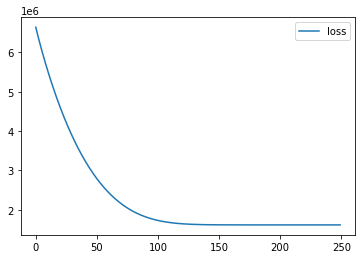

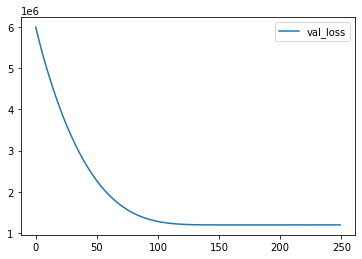

In [68]:
x = np.linspace(0, epochs-1, epochs)

plt.plot(x, model_loss.loss, label="loss")
plt.legend()
plt.show()

plt.plot(x, model_loss.val_loss, label="val_loss")
plt.legend()
plt.show()


In [69]:
p = iter(vdl)
preds = np.vstack([model(V(next(p))).cpu().data.numpy() for i in range(len(p))])

/opt/conda/lib/python3.9/site-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [70]:
error_nonfraud = np.mean(np.power((valid_x-preds),2), axis=1)

In [71]:
error_df = pd.DataFrame(data = {'error':error_nonfraud,'true':valid_y})

error_df.groupby('true')['error'].describe().reset_index()

,true,count,mean,std,min,25%,50%,75%,max
0,0,7120.0,1.162745e+06,8.496503e+06,20.311716,27971.205471,127819.316348,438996.281626,1.709867e+08
1,1,802.0,1.494508e+06,1.001448e+07,59.250163,26332.773347,125980.760591,468445.439956,1.697571e+08


In [72]:
valid_df.Abnormal.value_counts()

0    7120
1     802
Name: Abnormal, dtype: int64

In [74]:
val_dl = iter(vdl)
val_preds = [get_pred(next(val_dl)) for i in range(len(val_dl))]

/opt/conda/lib/python3.9/site-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [76]:
val_preds[0]

tensor([[ 68.6016, 103.3202,  69.3593,  ..., 128.0390, 138.1360, 129.1872],
        [ 68.6016, 103.3202,  69.3593,  ..., 128.0390, 138.1360, 129.1872],
        [ 68.6016, 103.3202,  69.3593,  ..., 128.0390, 138.1360, 129.1872],
        ...,
        [ 68.6016, 103.3202,  69.3593,  ..., 128.0390, 138.1360, 129.1872],
        [ 68.6016, 103.3202,  69.3593,  ..., 128.0390, 138.1360, 129.1872],
        [ 68.6016, 103.3202,  69.3593,  ..., 128.0390, 138.1360, 129.1872]],
       grad_fn=<AddmmBackward0>)